# Цель исследования - понять, какой признак оказывает наиболее существенное влияние на намерение сотрудника покинуть компанию

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#считываем данные и смотрим общую информацию
df = pd.read_csv('HR_comma_sep.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#смотрим основные метрики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


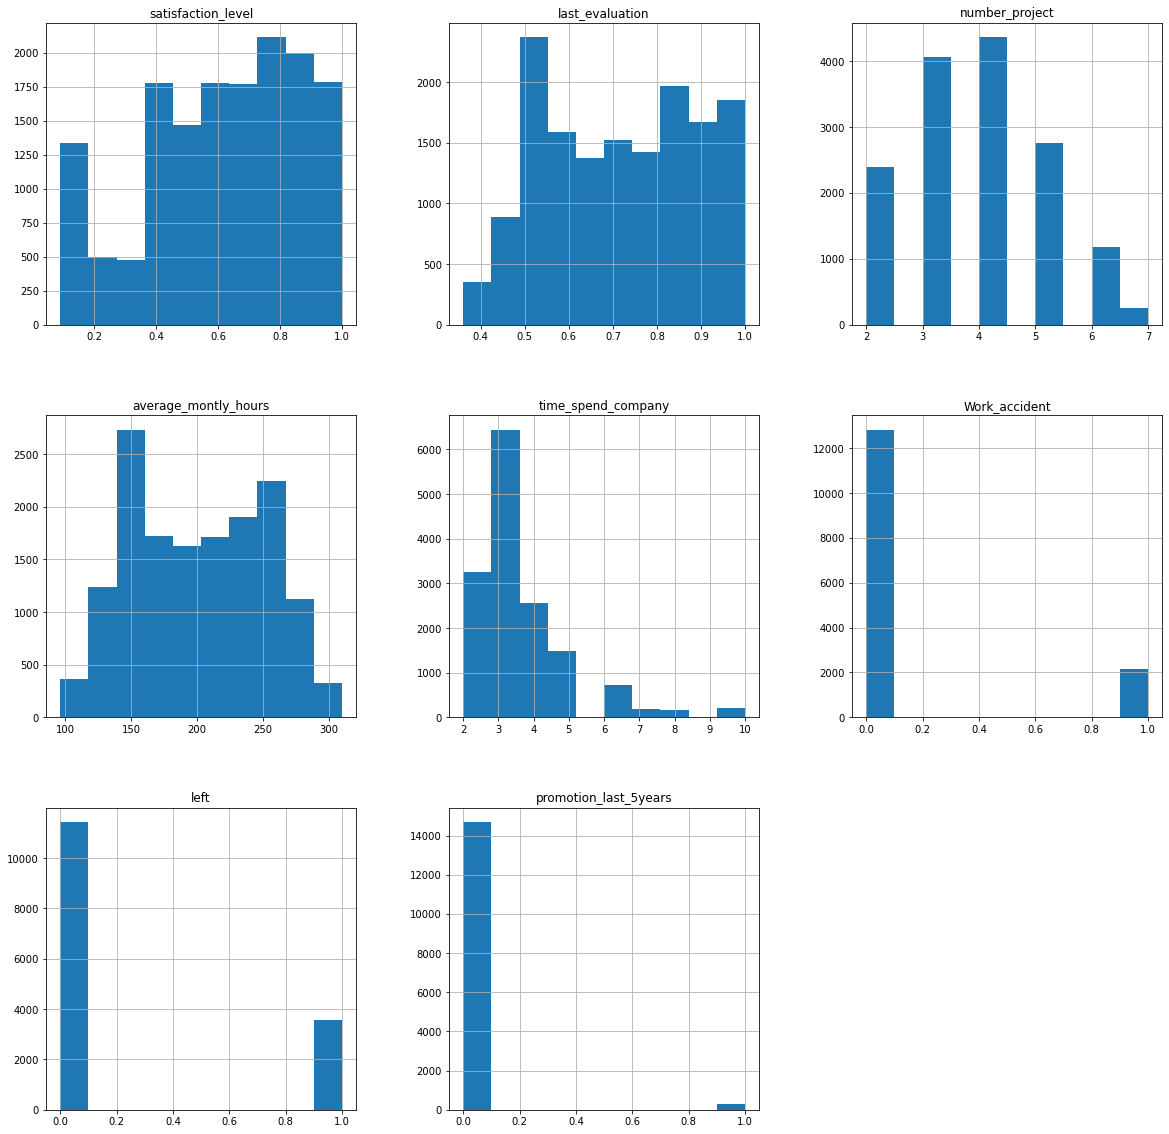

In [5]:
#смотрим каждый признак отдельно в виде гистограммы
df.hist(figsize=(20,20))
plt.show()

(array([4140.,  767.,  739., 2720., 2229.,  630., 1227.,  902.,  858.,
         787.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

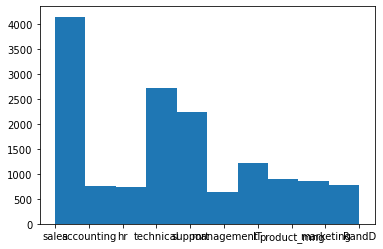

In [6]:
#смотрим распределение по департаментам
plt.hist(df['Department'])

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

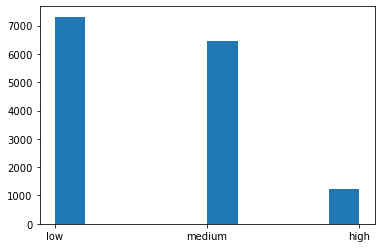

In [7]:
#смотрим распределение по зарплате
plt.hist(df['salary'])

In [8]:
#удаляем аномальные значения по уровню удовлетворенности
df['anomally_satisfaction_level'] = np.where(
                            df['satisfaction_level'] > 
                            np.mean(df.satisfaction_level) + 3*np.std(df.satisfaction_level),                 
                            1, 0)
df_anomally_satisfaction_level = df[df['satisfaction_level'] == 1]

df=df.drop(df_anomally_satisfaction_level.index)

In [9]:
#удаляем аномальные значения по последней оценке
df['anomally_last_evaluation'] = np.where(
                            df['last_evaluation'] > 
                            np.mean(df.last_evaluation) + 3*np.std(df.last_evaluation),                 
                            1, 0)
df_anomally_last_evaluation = df[df['last_evaluation'] == 1]


df=df.drop(df_anomally_last_evaluation.index)


In [10]:
#удаляем аномальные значения по количеству проектов
df['anomally_number_project'] = np.where(
                            df['number_project'] > 
                            np.mean(df.number_project) + 3*np.std(df.number_project),                 
                            1, 0)
df_anomally_number_project = df[df['number_project'] == 1]

df=df.drop(df_anomally_number_project.index)

In [11]:
#удаляем аномальные значения по среднему количеству рабочих часов
df['anomally_average_montly_hours'] = np.where(
                            df['average_montly_hours'] > 
                            np.mean(df.average_montly_hours) + 3*np.std(df.average_montly_hours),                 
                            1, 0)
df_anomally_average_montly_hours = df[df['average_montly_hours'] == 1]

df=df.drop(df_anomally_average_montly_hours.index)

In [12]:
#удаляем аномальные значения по времени в компании
df['anomally_time_spend_company'] = np.where(
                            df['time_spend_company'] > 
                            np.mean(df.time_spend_company) + 3*np.std(df.time_spend_company),                 
                            1, 0)
df_anomally_time_spend_company = df[df['time_spend_company'] == 1]

df=df.drop(df_anomally_time_spend_company.index)

In [13]:
#Разделим данные на признаки и на тот параметр, который мы хотим предсказывать

X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department','salary']]

y = df[['left']].values.ravel()

In [14]:
#Подготовим данные. Сначала назначим цифры вместо текстовых признаков - Department и salary

from sklearn.preprocessing import LabelEncoder
# creat1ing initial dataframe
temp_df1 = pd.DataFrame(X[['Department']])
temp_df2 = pd.DataFrame(X[['salary']])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
X['Department_id'] = labelencoder.fit_transform(temp_df1['Department'])
X['salary_id'] = labelencoder.fit_transform(temp_df2['salary'])

X.head(10)

X_new = X[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department_id','salary_id']]

#Подготовим данные.Отнормируем числовые признаки

from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

X_scaled = scaling(X_new)

<ipython-input-14-ededd401d325>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Department_id'] = labelencoder.fit_transform(temp_df1['Department'])
<ipython-input-14-ededd401d325>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['salary_id'] = labelencoder.fit_transform(temp_df2['salary'])


In [15]:
#Разделим датасет на трейновый и тестовый
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10224, 9)
(4382, 9)
(10224,)
(4382,)


# Logistic regression

In [16]:
#Обучаем логистическую регрессию
from sklearn.linear_model import LogisticRegression
lin_model = LogisticRegression()
lin_model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department','salary']

In [18]:
#Пропишем вес каждого признака
importance = lin_model.coef_
for i in range(len(names)):
    print(names[i], importance[0][i])

satisfaction_level -3.835541932504248
last_evaluation 0.21492538722516907
number_project -1.3991721763263159
average_montly_hours 0.7768450461292723
time_spend_company 1.5534698392659607
Work_accident -1.459962610284176
promotion_last_5years -1.9937057557154922
Department 0.39322207625214606
salary -0.04482211188704232


In [19]:
#Посмотрим метрики 
from sklearn.metrics import classification_report

In [20]:
print(classification_report(Y_test, lin_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      3342
           1       0.56      0.28      0.38      1040

    accuracy                           0.78      4382
   macro avg       0.68      0.61      0.62      4382
weighted avg       0.75      0.78      0.75      4382



# Tree

In [21]:
#Обучим алгоритм "Дерево"
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
#Посмотрим метрики 
print(classification_report(Y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3342
           1       0.93      0.98      0.96      1040

    accuracy                           0.98      4382
   macro avg       0.96      0.98      0.97      4382
weighted avg       0.98      0.98      0.98      4382



# Random forest

In [ ]:
#Обучим алгоритм "Random forest"
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(max_depth=5, n_estimators = 200, random_state=0)
forest.fit(X_train, Y_train)

In [ ]:
#Посмотрим метрики 
print(classification_report(Y_test, forest.predict(X_test)))

# Выводы

In [ ]:
1. Алгоритм Tree с наибольшей точностью классифицирует сотрудников по признаку left
2. Наиболее весомым признаком является satisfaction_level
3. Наименее весомым признаком является salary
